**Introduction**

The term "stock market" refers to a group of markets and exchanges where routine transactions involving the purchase, sale, and issue of shares of publicly traded firms are conducted. These financial transactions take place on either official exchanges or over-the-counter (OTC) markets, which are governed by a specific set of rules. A nation or region may have several stock trading venues that permit the trading of stocks and other types of assets. To create a model that can estimate stock prices, the dataset of Apple Inc. stock prices from December 1980 to March 2023 was used.

In [1]:
#!pip install pmdarima


In [2]:
import numpy as np  
import pandas as pd 
import os

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler

from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [3]:
df = pd.read_csv('C:/Users/user/Desktop/ALL_Learning/Data Science/Apple Stock Data Analysis/AAPL.csv')
df.head(8)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097987,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102756,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107093,46950400


In [4]:
# The data will be scaled to a range of 0 to 1.
scaler = MinMaxScaler(feature_range=(0, 1))

Text(0.5, 1.0, 'Stock Price of Apple Inc. over the Years')

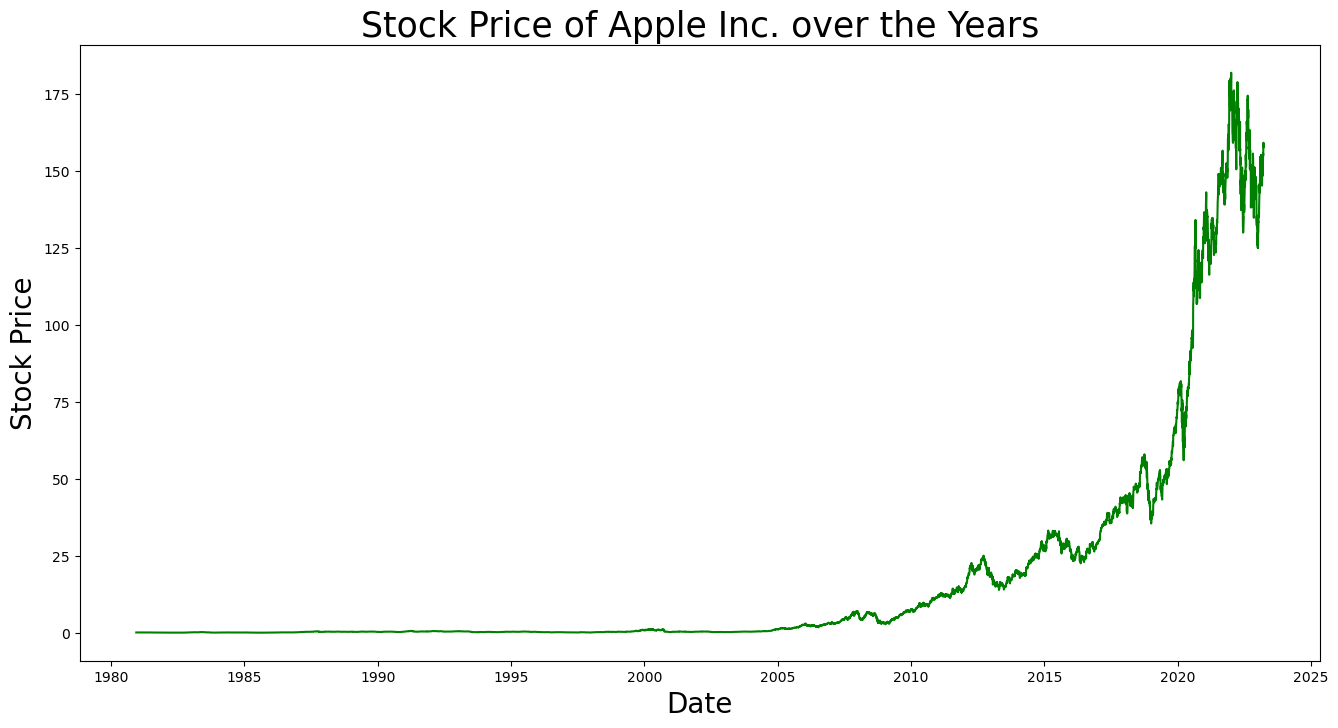

In [5]:
df['Date'] = pd.to_datetime(df.Date,format='%Y/%m/%d %H:%M:%S')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Apple Inc. over the Years',size=25)

**K-Nearest Neighbours**

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method . Based on the independent variables, kNN finds the similarity between new data points and old data points.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. If k = 1, then the output is simply assigned to the value of that single nearest neighbor.

-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (7994, 1)
Shape of Validation Set (2664, 1)
RMSE value on validation set: 76.66120067288625
-----------------------------------------------------------
-----------------------------------------------------------


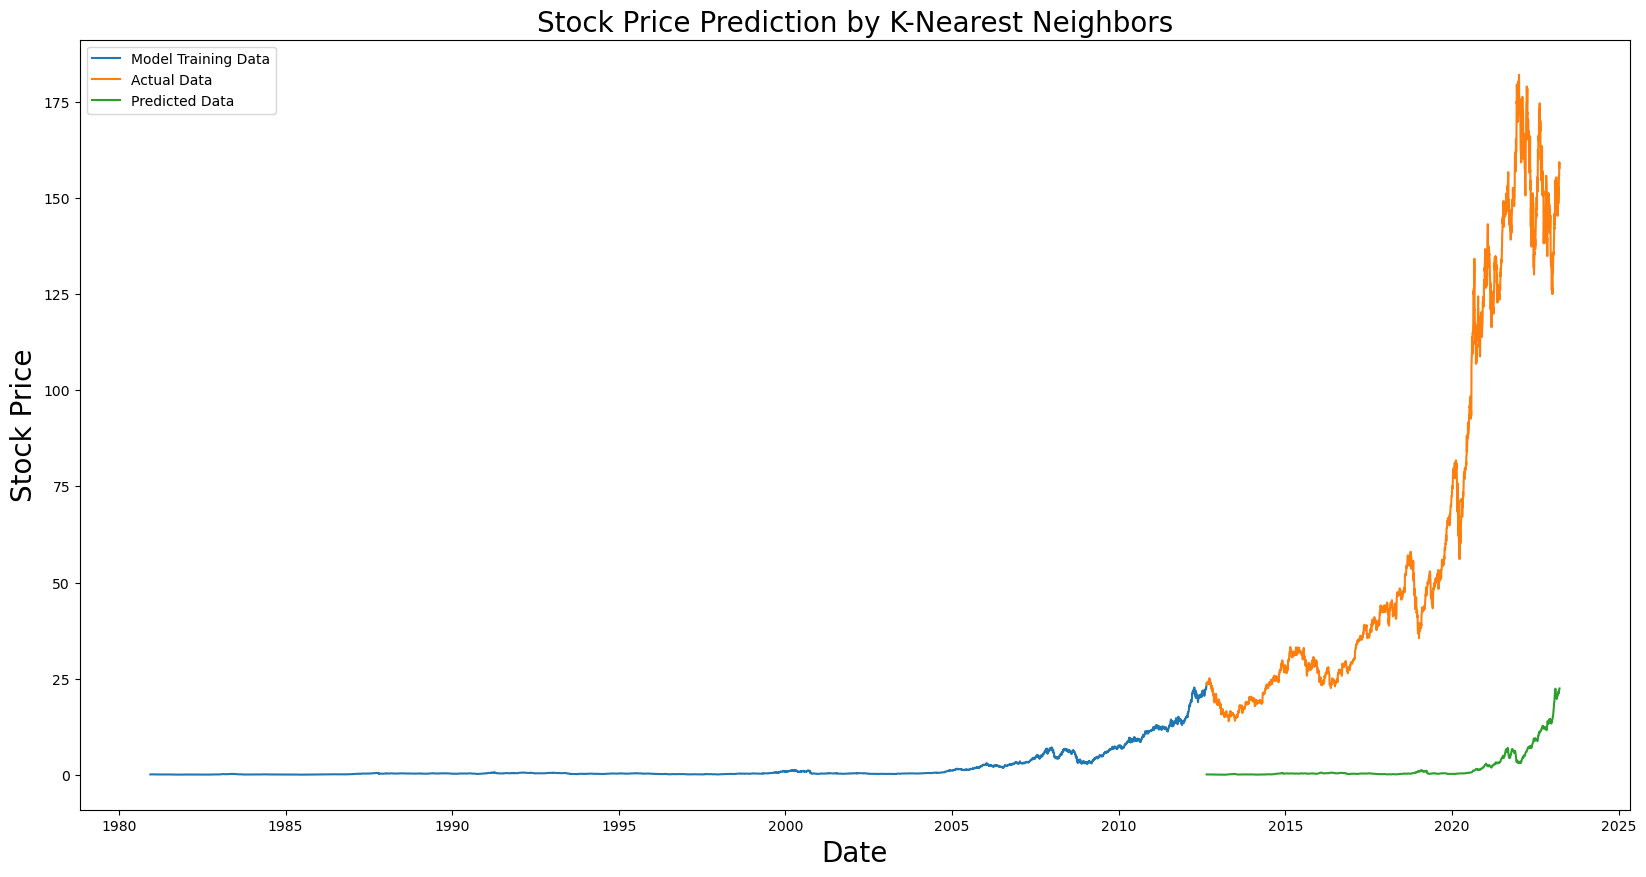

In [6]:
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
k_nearest_neighbours_predict(df)

**Long Short Term Memory (LSTM)**

An artificial neural network called Long Short-Term Memory (LSTM) is employed in deep learning and artificial intelligence. LSTM features feedback connections as opposed to typical feedforward neural networks.

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (7994, 1)
Shape of Validation Set (2664, 1)
Epoch 1/10
7954/7954 - 123s - loss: 1.1570e-05 - 123s/epoch - 15ms/step
Epoch 2/10
7954/7954 - 121s - loss: 4.5958e-06 - 121s/epoch - 15ms/step
Epoch 3/10
7954/7954 - 118s - loss: 2.7476e-06 - 118s/epoch - 15ms/step
Epoch 4/10
7954/7954 - 120s - loss: 1.9718e-06 - 120s/epoch - 15ms/step
Epoch 5/10
7954/7954 - 111s - loss: 2.0078e-06 - 111s/epoch - 14ms/step
Epoch 6/10
7954/7954 - 112s - loss: 1.6180e-06 - 112s/epoch - 14ms/step
Epoch 7/10
7954/7954 - 111s - loss: 1.6525e-06 - 111s/epoch - 14ms/step
Epoch 8/10
7954/7954 - 112s - loss: 1.4524e-06 - 112s/epoch - 14ms/step
Epoch 9/10
7954/7954 - 115s - loss: 1.3588e-06 - 115s/epoch - 14ms/step
Epoch 10/10
7954/7954 - 110s - loss: 1.2495e-06 - 11

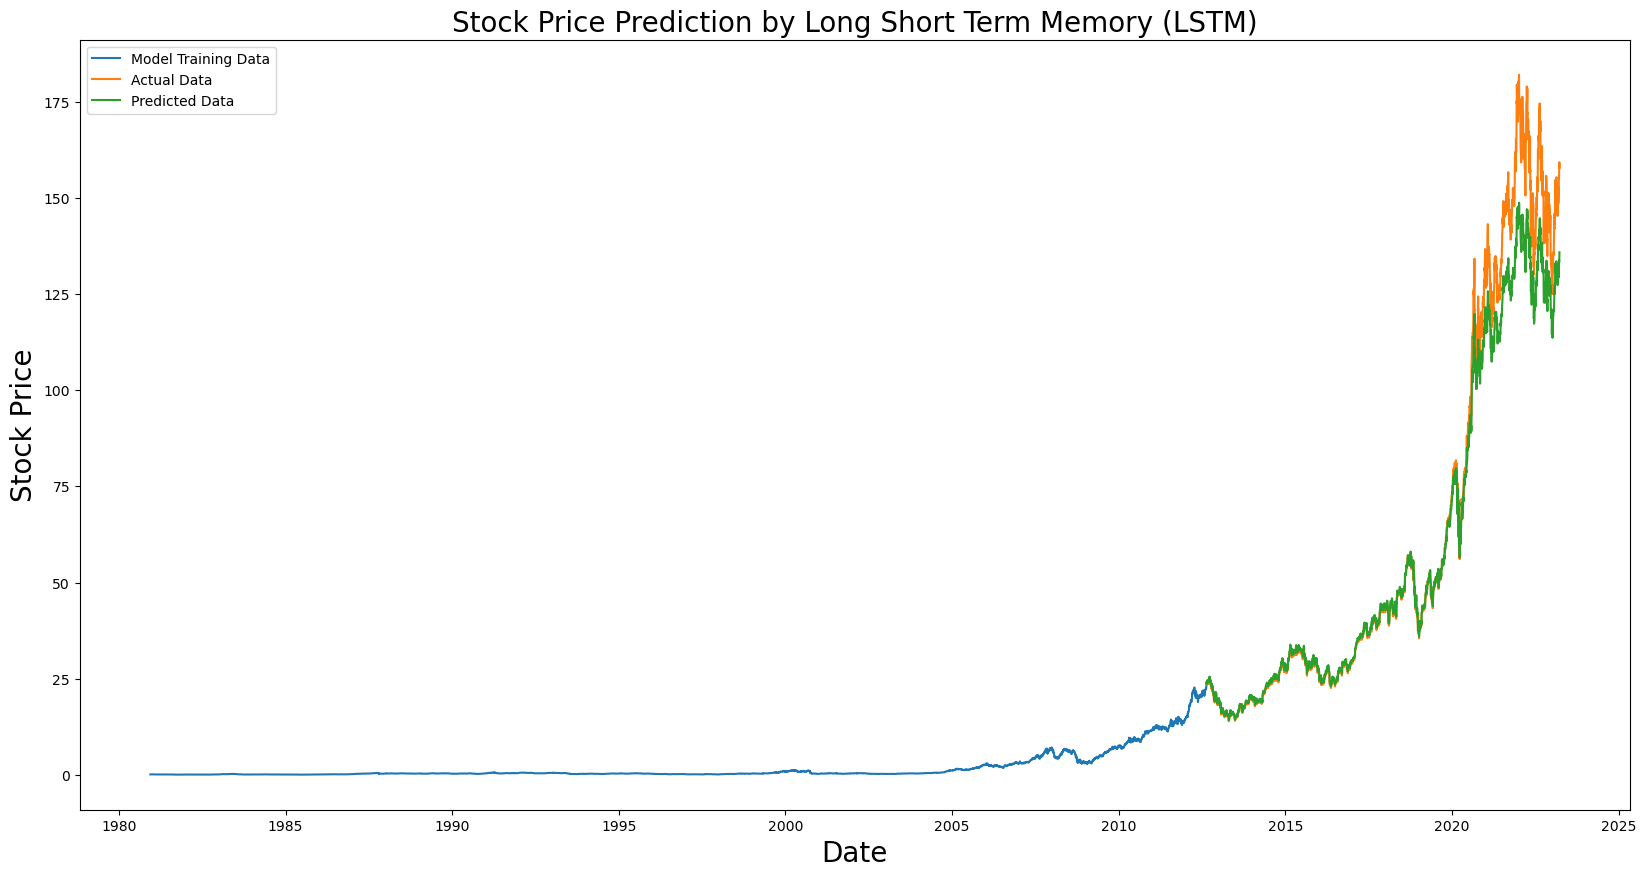

In [7]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    # Create and fit the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)
    
     
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid - closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
lstm_prediction(df)

It should be noted that predicting the time series of stocks may be inefficient due to the number of elements involved in the choice. It is preferable to use additional data, which does not guarantee a particularly exact outcome.